## <center>Neural Networks and Deep Learning </center>
### <center>2nd Project - SVM Binary Classification on Mnist
#### <center>Author : Anastasios Gerontopoulos - AEM: 9682 </center>

#### -> In this project we will use the MNIST digit dataset to classify the digits images to two different classes, odd or even.<br> It is a binary classification problem, and we will represent odd numbers as class 0 and even numbers as class 1.<br>-> This notebook is completely functional and can be run through cell after cell to produce the results.<br>-> All the results, plots,conclusions and code are included in this notebook. <br>-> Python version is 3.9 <br>-> Modules used are numpy, matplotlib, tensorflow, scikit-learn, and time.

### <center> Concerning the SVM classification </center>
#### Support Vector Machines (SVM's) are supervised learning models suitable for both regression and classification tasks.<br>They are widely considered as one of the most robust prediction models. However, SVM's classification does not support probabilistic predictions; such models predict only the labels of the testing samples. SVM's are very efficient in performing non linear classification tasks, using kernels to map the input into new, high dimensional feature spaces.<br> There are different types of kernels to use, including linear kernels and non linear ones, such as sigmoid, polynomial or rbf kernels. The parameters we will alter are the regularization parameter C, and the degree parameter (regarding only the 'polynomial' kernel). As for the C parameter, the default equals to 1.0, if we increase it, the penalty for misclassification increases, while if we decrease C, the penalty of misclassification decreases. <br> SVM's are implemented in different Machine Learning toolkits. Two of the most popular implementations are the LibSvm library, and the LibLinear.<br> In this project, we used the scikit-learn implementations, and the SVC and LinearSVC classes. SVC is based on the libsvm implementation, while LinearSvc is based on the liblinear, providing a little more flexibility with the input parameters.

In [1]:
### Necessary imports - always run this cell

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras import datasets
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from time import time_ns

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print(X_train.shape, y_train.shape)                                ### print the shape of the data to get a first insight

X_train, X_test = X_train /255.0 , X_test/255.0                    ### scale the pixel values.

X_train = X_train.reshape(X_train.shape[0],-1)                     ### reshape the samples as 1-Dimensional for the SVM's
X_test = X_test.reshape(X_test.shape[0],-1)                        ### reshape the testing samples as 1-Dimensional for the SVM's


(60000, 28, 28) (60000,)


In [3]:
""" Now we have to change the labels for the images. This is because, in this project our goal is not to classify digits,
    but to classify the digit as odd (Class 0) or even (Class 1). This change will be made to both training and testing labels.
    To this end, we create a function."""

def change_labels(labels):
    for i in range(0, labels.shape[0]):
        modulo = labels[i] % 2
        if(modulo == 1):                ### the label is odd
            labels[i] = 1
        else:                           ### the label is even
            labels[i] = 0
    
    return labels

y_train_new = change_labels(y_train)
y_test_new = change_labels(y_test)


#### 1st trial with SVC

In [4]:
### First trial with SVC: We choose hyperparameter C=1.0, and a linear kernel.
### The choice of LinearSVC over SVC is done with training time criteria; it fits to the data much faster.

linear_svm_1 = LinearSVC(C=1.0, random_state=42)
starting_time_1 = time_ns()
linear_svm_1.fit(X_train, y_train_new)
training_time_1 = time_ns() - starting_time_1
print("The SVM with linear kernel and C=1.0 took ", training_time_1, " nanoseconds to train.")
predictions_1 = linear_svm_1.predict(X_test)
accuracy_1 = accuracy_score(y_test_new, predictions_1)

The SVM with linear kernel and C=1.0 took  22909794000  nanoseconds to train.


c:\Users\nasos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [5]:
### Evaluation of the first trial for the validation set. 

f1_score_1 = f1_score(y_test_new, predictions_1, average='macro')
print("Validation set scores: we get ", accuracy_1, "accuracy score and ", f1_score_1, "macro f1_score")
print("Confusion matrix for this classification:")
print(confusion_matrix(y_test_new, predictions_1))
print(classification_report(y_test_new, predictions_1))

Validation set scores: we get  0.9008 accuracy score and  0.9007752295282995 macro f1_score
Confusion matrix for this classification:
[[4425  501]
 [ 491 4583]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4926
           1       0.90      0.90      0.90      5074

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [8]:
### Evaluation of the first trial for the training set.

training_predictions_1 = linear_svm_1.predict(X_train)
print("Training set scores: we get ", accuracy_score(y_train_new,training_predictions_1), "accuracy score and ", f1_score(y_train_new,training_predictions_1, average='macro'), "macro f1_score")
print("Confusion matrix for this classification:")
print(confusion_matrix(y_train_new, training_predictions_1))
print(classification_report(y_train_new, training_predictions_1))

Training set scores: we get  0.9025833333333333 accuracy score and  0.9025433700240038 macro f1_score
Confusion matrix for this classification:
[[26470  3022]
 [ 2823 27685]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     29492
           1       0.90      0.91      0.90     30508

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000



In [9]:
### Before going on, we will check the distribution of the two classes.
### We will do this by the value counts function of the pandas library.

print("Class distribution of the training set:")
print(pd.value_counts(y_train_new))
print("Class distribution of the testing set:")
print(pd.value_counts(y_test_new))

Class distribution of the training set:
1    30508
0    29492
dtype: int64
Class distribution of the testing set:
1    5074
0    4926
dtype: int64


#### Notes: What we can see here is that, the distribution of the two classes is almost equally balanced, with a few more samples belonging to class 0.<br> So macro f1_score (which is the average f1-score of the two classes), is a good metric for evaluation, along with accuracy score. The classifier performs relatively well; it scores ~90% accuracy score in the testing set and ~ 90 % accuracy in the training set.<br> The problem is that, as we remember from the previous projects, 3-NN Neighbors Classifier scored over 95%, and trained very fast, while the Convolutional network scored approximately 99%, so this svm model is not efficient.


#### 2nd trial: We alter the C hyperparameter of the LinearSVC class.

In [7]:
### Second model with SVC: We choose hyperparameter C=0.1, and a linear kernel.

linear_svm_2 = LinearSVC(C=0.1, random_state=42)
starting_time_2 = time_ns()
linear_svm_2.fit(X_train, y_train_new)
training_time_2 = time_ns() - starting_time_2
print("The SVM with linear kernel and C=0.1 took ", training_time_2, " nanoseconds to train.")
predictions_2 = linear_svm_2.predict(X_test)

### Evaluation of the second model for the validation set. 

accuracy_2 = accuracy_score(y_test_new, predictions_2)
f1_score_2 = f1_score(y_test_new, predictions_2, average='macro')
print("Validation set scores: we get ", accuracy_2, "accuracy score and ", f1_score_2, "macro f1_score")
print("Confusion matrix for this classification:")
print(confusion_matrix(y_test_new, predictions_2))
print(classification_report(y_test_new, predictions_2))

The SVM with linear kernel and C=0.1 took  8905291400  nanoseconds to train.
Validation set scores: we get  0.9012 accuracy score and  0.9011789353018489 macro f1_score
Confusion matrix for this classification:
[[4433  493]
 [ 495 4579]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4926
           1       0.90      0.90      0.90      5074

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [11]:
### Evaluation of the second model on the training set.

training_predictions_2 = linear_svm_2.predict(X_train)
print("Training set scores: we get ", accuracy_score(y_train_new,training_predictions_2), "accuracy score and ", f1_score(y_train_new,training_predictions_2, average='macro'), "macro f1_score")
print("Confusion matrix for this classification:")
print(confusion_matrix(y_train_new, training_predictions_2))
print(classification_report(y_train_new, training_predictions_2))

Training set scores: we get  0.9024333333333333 accuracy score and  0.9023976026139098 macro f1_score
Confusion matrix for this classification:
[[26499  2993]
 [ 2861 27647]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     29492
           1       0.90      0.91      0.90     30508

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000



#### Notes: This model with C=0.1 performs almost the same as the previous one; it scores ~90.08 % on the validations set and ~90.24% on the training set.<br> The only difference is that this classifies correctly a few more samples. Also, it need about half of the time to train.

In [12]:
# 3rd trial: We will use a sigmoid kernel with reguralization parameter C=1.0 and gamma = scale

sigmoid_svm = SVC(C=1.0, kernel='sigmoid',gamma='scale', random_state=42)
starting_time_3 = time_ns()
sigmoid_svm.fit(X_train, y_train_new)
training_time_3 = time_ns() - starting_time_3
print("The SVM with sigmoid kernel, C=1.0 and gamma=scale took ", training_time_3, " nanoseconds to train.")
predictions_3 = sigmoid_svm.predict(X_test)


The SVM with sigmoid kernel, C=1.0 and gamma=scale took  821093509500  nanoseconds to train.
Validation set scores: we get  0.6944 accuracy score and  0.6943434657674283 macro f1_score
Confusion matrix for this classification:
[[3404 1522]
 [1534 3540]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      4926
           1       0.70      0.70      0.70      5074

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [13]:
### Evaluation of the sigmoid kernel on the testing set.

accuracy_3 = accuracy_score(y_test_new, predictions_3)
f1_score_3 = f1_score(y_test_new, predictions_3, average='macro')
print("Validation set scores: we get ", accuracy_3, "accuracy score and ", f1_score_3, "macro f1_score")
print("Confusion matrix for this classification:")
print(confusion_matrix(y_test_new, predictions_3))
print(classification_report(y_test_new, predictions_3))

Validation set scores: we get  0.6944 accuracy score and  0.6943434657674283 macro f1_score
Confusion matrix for this classification:
[[3404 1522]
 [1534 3540]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      4926
           1       0.70      0.70      0.70      5074

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



#### Notes: We got only 0.69 validation accuracy, and it needed much more time to be trained. So it is clearly not efficient for this classification task.<br><br> Moving on, we will try a polynomial kernel with the default parameters.

In [14]:
### 4th trial : We will use a polynomial kernel, with C=1.0, gamma=scale, and degree=3 (default parameters).

poly_svm = SVC(C=1.0, kernel='poly', gamma='scale', random_state=42)
starting_time_4 = time_ns()
poly_svm.fit(X_train, y_train_new)
training_time_4 = time_ns() - starting_time_4
print("The SVM with polynomial kernel, C=1.0 and gamma=scale took ", training_time_4, " nanoseconds to train.")
predictions_4 = poly_svm.predict(X_test)

### Evaluation of the fourth model for the validation set. 

accuracy_4 = accuracy_score(y_test_new, predictions_4)
f1_score_4 = f1_score(y_test_new, predictions_4, average='macro')
print("Validation set scores: we get ", accuracy_4, "accuracy score and ", f1_score_4, "macro f1_score")
print("Confusion matrix for this classification:")
print(confusion_matrix(y_test_new, predictions_4))
print(classification_report(y_test_new, predictions_4))

The SVM with polynomial kernel, C=1.0 and gamma=scale took  414605974500  nanoseconds to train.
Validation set scores: we get  0.9877 accuracy score and  0.9876971200188251 macro f1_score
Confusion matrix for this classification:
[[4862   64]
 [  59 5015]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4926
           1       0.99      0.99      0.99      5074

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [15]:
### Evaluation of the fourth model on the training set.

training_predictions_4 = poly_svm.predict(X_train)
print("Training set scores: we get ", accuracy_score(y_train_new,training_predictions_4), "accuracy score and ", f1_score(y_train_new,training_predictions_4, average='macro'), "macro f1_score")
print("Confusion matrix for this classification:")
print(confusion_matrix(y_train_new, training_predictions_4))
print(classification_report(y_train_new, training_predictions_4))

Training set scores: we get  0.9936666666666667 accuracy score and  0.9936646140016032 macro f1_score
Confusion matrix for this classification:
[[29270   222]
 [  158 30350]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29492
           1       0.99      0.99      0.99     30508

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



#### Notes: The SVC classifier with a degree=3 polynomial kernel performs very good; it achieves ~ 98.7% accuracy on the validation set, and ~ 99.3% accuracy on the training set.  These scores are very high, so this type of SVM is suitable for this classification task. It needed much more time to train though, when comparing with the linear SVC experiments. <br><br> 5th experiment: Lets try this polynomial svm with a degree=4 polynomial.

In [16]:
### 5th trial: use the previous SVC with polynomial kernel but degree = 4, to see if it improves more.

poly_svm_2 = SVC(C=1.0, kernel='poly', degree=4, gamma='scale', random_state=42)
starting_time_5 = time_ns()
poly_svm_2.fit(X_train, y_train_new)
training_time_5 = time_ns() - starting_time_5
print("The SVM with polynomial kernel and degree=4 took ", training_time_5, " nanoseconds to train.")
predictions_5 = poly_svm_2.predict(X_test)

### Evaluation of the fifth model for the validation set. 

accuracy_5 = accuracy_score(y_test_new, predictions_5)
f1_score_5 = f1_score(y_test_new, predictions_5, average='macro')
print("Validation set scores: we get ", accuracy_5, "accuracy score and ", f1_score_5, "macro f1_score")
print("Confusion matrix for this classification:")
print(confusion_matrix(y_test_new, predictions_5))
print(classification_report(y_test_new, predictions_5))



The SVM with polynomial kernel and degree=4 took  468907927900  nanoseconds to train.
Validation set scores: we get  0.9846 accuracy score and  0.9845945550995545 macro f1_score
Confusion matrix for this classification:
[[4829   97]
 [  57 5017]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4926
           1       0.98      0.99      0.98      5074

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [17]:
### Evaluation of the fifth model on the training set.

training_predictions_5 = poly_svm_2.predict(X_train)
print("Training set scores: we get ", accuracy_score(y_train_new,training_predictions_5), "accuracy score and ", f1_score(y_train_new,training_predictions_5, average='macro'), "macro f1_score")
print("Confusion matrix for this classification:")
print(confusion_matrix(y_train_new, training_predictions_5))
print(classification_report(y_train_new, training_predictions_5))

Training set scores: we get  0.9939166666666667 accuracy score and  0.9939140378539137 macro f1_score
Confusion matrix for this classification:
[[29194   298]
 [   67 30441]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29492
           1       0.99      1.00      0.99     30508

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



#### Results: Training and validation accuracy were similar; actually while training accuracy improved a little bit (only a few more samples predicted correctly), the validation score decreased the same (just a few more samples predicted wrong). This may be the result of overfitting, as the model became more complex, it fitted more to the training data and became a little more biased.

In [20]:
### 6th trial: use an SVM with a rbf kernel (the default one for the SVC class, and C=1.0)

rbf_svm = SVC(C=1.0, gamma='scale', random_state=42)
starting_time_6 = time_ns()
rbf_svm.fit(X_train, y_train_new)
training_time_6 = time_ns() - starting_time_6
print("The SVM with the rbf kernel took ", training_time_6, " nanoseconds to train.")
predictions_6 = rbf_svm.predict(X_test)

### Evaluation of the 6th model for the validation set. 

accuracy_6 = accuracy_score(y_test_new, predictions_6)
f1_score_6 = f1_score(y_test_new, predictions_6, average='macro')
print("Validation set scores: we get ", accuracy_6, "accuracy score and ", f1_score_6, "macro f1_score")
print("Confusion matrix for this classification:")
print(confusion_matrix(y_test_new, predictions_6))
print(classification_report(y_test_new, predictions_6))

The SVM with the rbf kernel took  396138311700  nanoseconds to train.
Validation set scores: we get  0.9864 accuracy score and  0.9863972571429303 macro f1_score
Confusion matrix for this classification:
[[4861   65]
 [  71 5003]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4926
           1       0.99      0.99      0.99      5074

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [19]:
### Evaluation of the rbf model on the training set.

training_predictions_6 = rbf_svm.predict(X_train)
print("Training set scores: we get ", accuracy_score(y_train_new,training_predictions_6), "accuracy score and ", f1_score(y_train_new,training_predictions_6, average='macro'), "macro f1_score")
print("Confusion matrix for this classification:")
print(confusion_matrix(y_train_new, training_predictions_6))
print(classification_report(y_train_new, training_predictions_6))

Training set scores: we get  0.9917833333333334 accuracy score and  0.9917812337102221 macro f1_score
Confusion matrix for this classification:
[[29274   218]
 [  275 30233]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29492
           1       0.99      0.99      0.99     30508

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


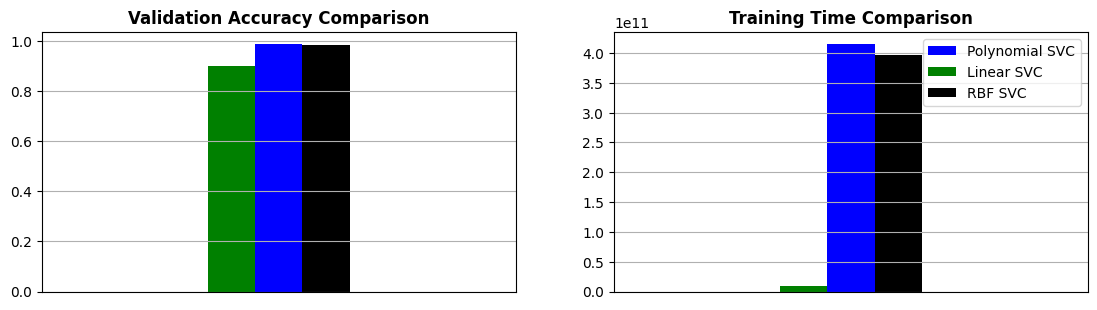

In [21]:
### Lets make some figures to compare the validation accuracy as well as the training time:

figure, axis = plt.subplots(1, 2 ,figsize = (12,4))
figure.tight_layout(pad=4.0)


axis[0].bar(0,accuracy_4,width = 0.1, color = 'blue', label = "Polynomial SVC" )
axis[0].bar(-0.1, accuracy_2, width = 0.1, color = 'green', label = "Linear SVC" )
axis[0].bar(0.1, accuracy_6, width = 0.1, color = 'black', label = "RBF SVC" )
axis[0].set_title("Validation Accuracy Comparison", fontweight = "bold")
axis[0].yaxis.grid()
plt.legend()
axis[0].set_xlim(-0.5,0.5)
axis[0].tick_params(axis='x',  which='both', bottom=False,  top=False,  labelbottom=False) 

axis[1].bar(0,training_time_4, width = 0.1, color = 'blue', label = "Polynomial SVC" )
axis[1].bar(-0.1, training_time_2, width = 0.1, color = 'green', label = "Linear SVC")
axis[1].bar(0.1, training_time_6, width = 0.1, color = 'black', label = "RBF SVC")
axis[1].set_title("Training Time Comparison", fontweight = "bold")
axis[1].yaxis.grid()
plt.legend()
axis[1].set_xlim(-0.5,0.5)

plt.tick_params(axis='x',  which='both', bottom=False,  top=False,  labelbottom=False) 

plt.show()

### <center> Section 3: Comparisons</center>

In [24]:
### In this section we will compare the SVM classifiers with the nearest-neighbors and the nearest centroid
### classifiers trained in the previous project.

## Define the classifiers
knn3_cls = KNeighborsClassifier(n_neighbors= 3, n_jobs= -1)
nc_cls = NearestCentroid()

## Fit them to our data
start_time_knn = time_ns()
knn3_cls.fit(X_train, y_train_new)
training_time_knn = time_ns() - start_time_knn
start_time_nc = time_ns()
nc_cls.fit(X_train, y_train_new)
training_time_nc = time_ns() - start_time_nc

## Make predictions

knn3_predictions = knn3_cls.predict(X_test)
nc_predictions = nc_cls.predict(X_test)

## Calculate the scores
knn3_accuracy = accuracy_score(y_test_new, knn3_predictions)
nc_accuracy = accuracy_score(y_test_new, nc_predictions)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


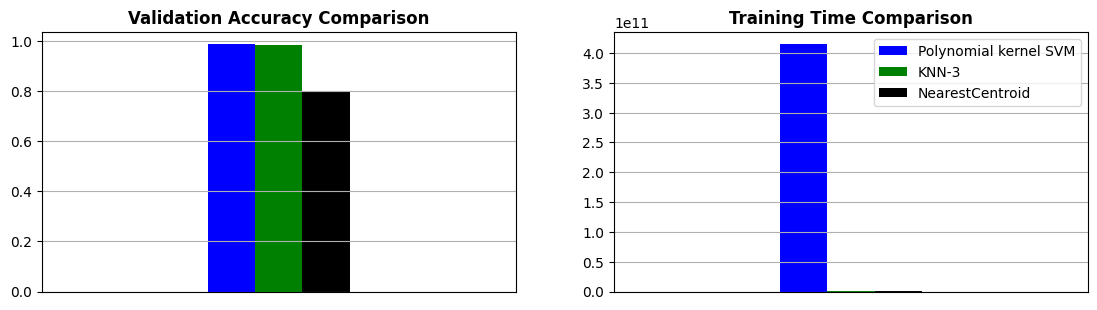

In [25]:
### Comparison Plots: We will choose the best SVM for comparison; the one with the polynomial kernel.

figure, axis = plt.subplots(1, 2 ,figsize = (12,4))
figure.tight_layout(pad=4.0)


axis[0].bar(-0.1,accuracy_4,width = 0.1, color = 'blue', label = "Polynomial kernel SVM" )
axis[0].bar(0, knn3_accuracy, width = 0.1, color = 'green', label = "KNN-3" )
axis[0].bar(0.1, nc_accuracy, width = 0.1, color = 'black', label = "NearestCentroid" )
axis[0].set_title("Validation Accuracy Comparison", fontweight = "bold")
axis[0].yaxis.grid()
plt.legend()
axis[0].set_xlim(-0.5,0.5)
axis[0].tick_params(axis='x',  which='both', bottom=False,  top=False,  labelbottom=False) 

axis[1].bar(-0.1,training_time_4, width = 0.1, color = 'blue', label = "Polynomial kernel SVM" )
axis[1].bar(0, training_time_knn, width = 0.1, color = 'green', label = "KNN-3")
axis[1].bar(0.1, training_time_nc, width = 0.1, color = 'black', label = "NearestCentroid")
axis[1].set_title("Training Time Comparison", fontweight = "bold")
axis[1].yaxis.grid()
plt.legend()
axis[1].set_xlim(-0.5,0.5)

plt.tick_params(axis='x',  which='both', bottom=False,  top=False,  labelbottom=False) 

plt.show()

#### We can notice that, Polynomial Kernel svm is more accurate than the other models, but requires much more training time (computational cost).<br> However its accuracy is very high, and it predicts wrongly only a few samples on the validation set. Lets plot them.


In [27]:
errors = predictions_4 != y_test_new
error_instances = X_test[errors]
print(error_instances.shape)

### Only 123 instances are predicted wrong by the polynomial SVM.

(123, 784)


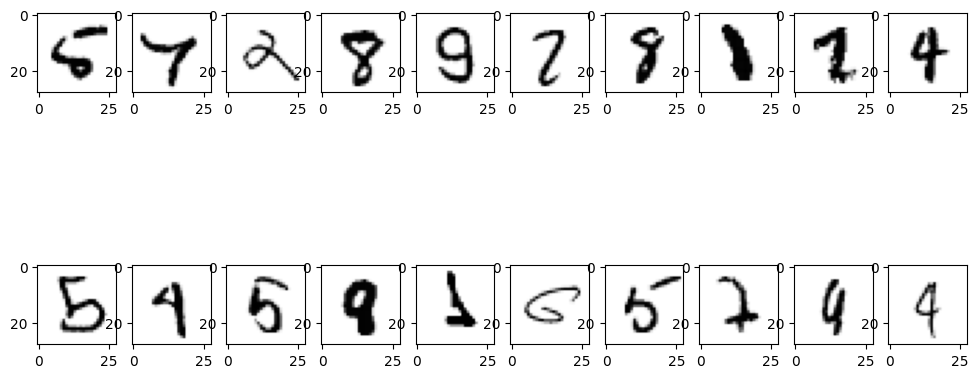

In [29]:
### Plot the first 20 of them. Note that some of them are even hard to recognize by humans.

error_instances = error_instances.reshape(-1,28,28)

fig, axis = plt.subplots(2,10 ,figsize = (12,6))
for i in range(20):
    if (i<10): 
        j = 0
    else:
        j = 1
    axis[j, i - j * 10].imshow(error_instances[i], cmap = 'Greys')
    

### <center> End of this notebook.<br> Merry Christmas and a Happy New Year !!!! </center>